In [59]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
import IPython
%matplotlib inline

(603, 813)


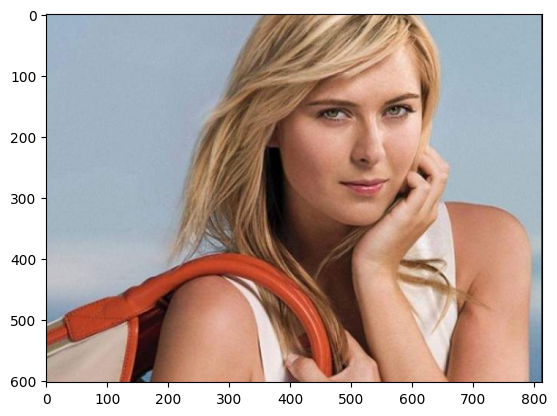

In [60]:
import os
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Replace with the actual absolute path to the image file
image_path = './tom_cruise/maria.png'

try:
    img = Image.open(image_path)
    img_array = np.array(img)
    gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
    print(gray.shape)
    plt.imshow(img)
    plt.show()
except FileNotFoundError:
    print(f"Error: Image file not found at {image_path}")

In [61]:
gray # DataType is uint8

array([[ 18,  18,  18, ...,  18,  18,  18],
       [180, 179, 179, ..., 181, 181,  18],
       [180, 180, 180, ..., 181, 181,  18],
       ...,
       [162, 162, 163, ..., 154, 151,  18],
       [161, 160, 160, ..., 162, 152,  18],
       [160, 159, 159, ..., 162, 153,  18]], dtype=uint8)

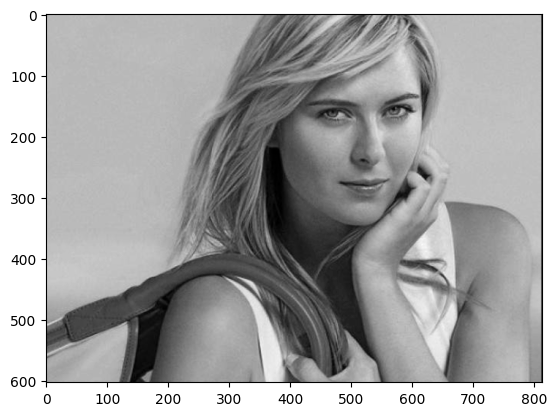

In [62]:
plt.imshow(gray, cmap='gray')

In [63]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[382,  51, 293, 293]], dtype=int32)

In [64]:
(x, y, w, h) = faces[0]
x, y, w, h

(382, 51, 293, 293)

Error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - img is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'img'
>  - img is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'img'

Type of 'img': <class 'PIL.PngImagePlugin.PngImageFile'>


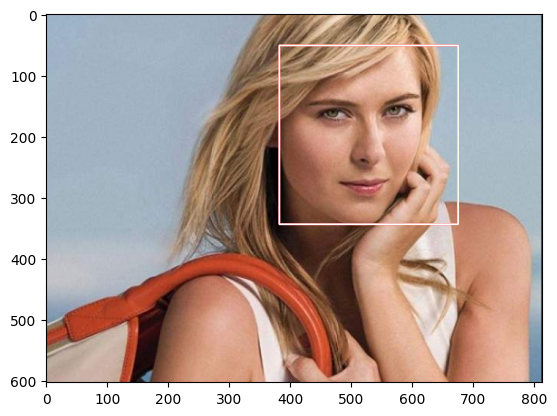

In [65]:
import cv2
import numpy as np

# Assuming 'img' is a valid NumPy array
try:
    face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    plt.imshow(face_img)
except cv2.error as e:
    print(f"Error: {e}")
    # Check the type of the 'img' variable
    print(f"Type of 'img': {type(img)}")
    # Try converting the image to a NumPy array
    if not isinstance(img, np.ndarray):
        try:
            img = np.array(img)
            face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
            plt.imshow(face_img)
        except Exception as e:
            print(f"Error: {e}")
    else:
        print("'img' is already a NumPy array, but the error persists.")

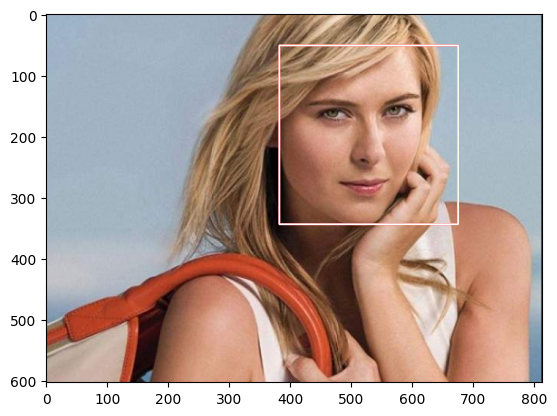

In [66]:
face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(face_img)

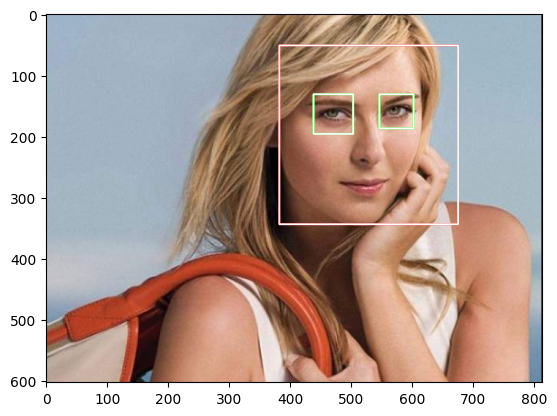

In [67]:
for (x, y, w, h) in faces:
    face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]  # Use the original image instead of face_img
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

plt.figure()
plt.imshow(img, cmap='gray')  # Display the original image with the detected face and eyes
plt.show()


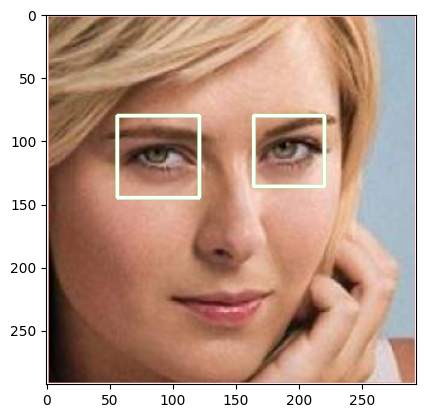

In [68]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray') # roi means region of interest
# roi_color sontains the image of the face, marked by the red revctangle

In [69]:
cropped_img = np.array(roi_color)
cropped_img.shape

(293, 293, 4)

In [70]:
import numpy as np
import pywt # Needed for Wavelet Transformation
import cv2

def w2d(img, mode = 'haar', level = 1):
    imArray = img
    # Datatype conversions
    # Convert image to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    # Convert to Float
    imArray = np.float32(imArray)
    imArray /= 255
    # Compute the Coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)
    # Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0; 
    # Reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

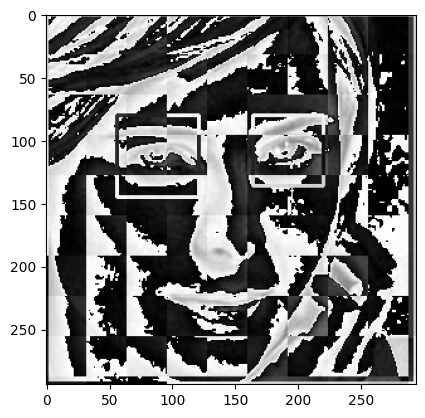

In [71]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [72]:
def get_cropped_image_if_2_eyes(image_path):
    # Read the image from the passsed image path
    img = cv2.imread(image_path)
    # Convert the image to gray
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detect the face
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        # if number of eyes greater than equal to 2 then return the cropped image
        if len(eyes) >= 2:
            return roi_color

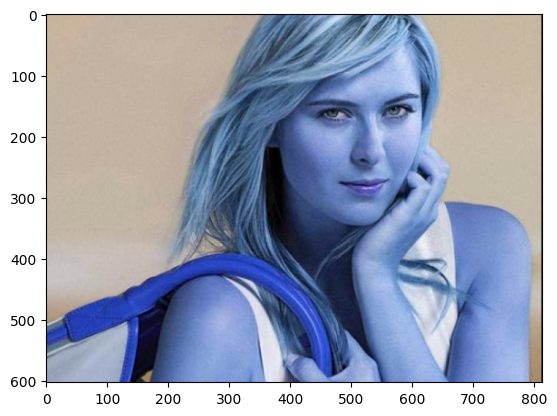

In [73]:
original_image = cv2.imread('./tom_cruise/maria.png')
#original_image = cv2.imread('C:/Users/umesh/Documents/My-repo/My-repo/Project-4-Face-Recognition/Raw-Image-Dataset')
plt.imshow(original_image)

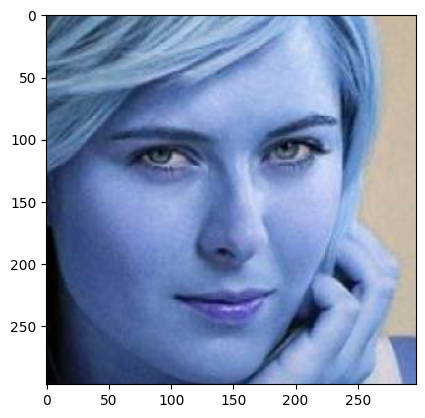

In [74]:
cropped_image = get_cropped_image_if_2_eyes('./tom_cruise/maria.png')
plt.imshow(cropped_image)

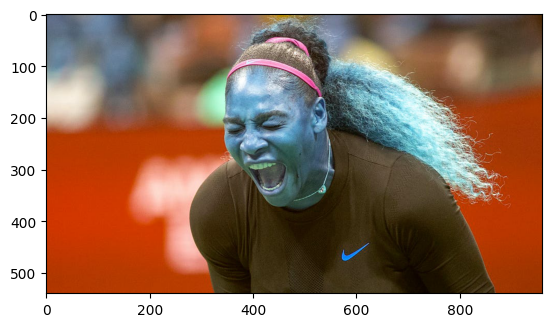

In [75]:
org_image_obstructed = cv2.imread('./tom_cruise/serena.jpg')
plt.imshow(org_image_obstructed)

In [76]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./tom_cruise/serena.jpg')
cropped_image_no_2_eyes

In [77]:
#path_to_data = "./dataset/"
path_to_data = "../Raw-Image-Dataset/"
path_to_cr_data = "./dataset/cropped/"

In [78]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [79]:
img_dirs

['../Raw-Image-Dataset/Mary-Kate-Olsen',
 '../Raw-Image-Dataset/Beyonce',
 '../Raw-Image-Dataset/leonardo-dicaprio',
 '../Raw-Image-Dataset/Dwayne-Johnson',
 '../Raw-Image-Dataset/Aish-Rya']

In [80]:
import shutil
# if the cropped folder already exists, then remove it
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
# Else create a new folder called cropped that's it!!
os.mkdir(path_to_cr_data)

In [81]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        try:
            roi_color = get_cropped_image_if_2_eyes(entry.path)
            if roi_color is not None:
                cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("Generating cropped images in folder: ", cropped_folder)
                cropped_file_name = celebrity_name + str(count) + ".png"
                cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
                cv2.imwrite(cropped_file_path, roi_color)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1
        except Exception as e:
            print(f"Error processing {entry.path}: {e}")

Generating cropped images in folder:  ./dataset/cropped/Mary-Kate-Olsen


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Generating cropped images in folder:  ./dataset/cropped/Beyonce


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Generating cropped images in folder:  ./dataset/cropped/leonardo-dicaprio


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Generating cropped images in folder:  ./dataset/cropped/Dwayne-Johnson
Generating cropped images in folder:  ./dataset/cropped/Aish-Rya


libpng warning: iCCP: known incorrect sRGB profile


In [82]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Mary-Kate-Olsen': ['./dataset/cropped/Mary-Kate-Olsen/Mary-Kate-Olsen174.png',
  './dataset/cropped/Mary-Kate-Olsen/Mary-Kate-Olsen160.png',
  './dataset/cropped/Mary-Kate-Olsen/Mary-Kate-Olsen148.png',
  './dataset/cropped/Mary-Kate-Olsen/Mary-Kate-Olsen92.png',
  './dataset/cropped/Mary-Kate-Olsen/Mary-Kate-Olsen86.png',
  './dataset/cropped/Mary-Kate-Olsen/Mary-Kate-Olsen79.png',
  './dataset/cropped/Mary-Kate-Olsen/Mary-Kate-Olsen51.png',
  './dataset/cropped/Mary-Kate-Olsen/Mary-Kate-Olsen45.png',
  './dataset/cropped/Mary-Kate-Olsen/Mary-Kate-Olsen44.png',
  './dataset/cropped/Mary-Kate-Olsen/Mary-Kate-Olsen50.png',
  './dataset/cropped/Mary-Kate-Olsen/Mary-Kate-Olsen78.png',
  './dataset/cropped/Mary-Kate-Olsen/Mary-Kate-Olsen87.png',
  './dataset/cropped/Mary-Kate-Olsen/Mary-Kate-Olsen93.png',
  './dataset/cropped/Mary-Kate-Olsen/Mary-Kate-Olsen149.png',
  './dataset/cropped/Mary-Kate-Olsen/Mary-Kate-Olsen161.png',
  './dataset/cropped/Mary-Kate-Olsen/Mary-Kate-Olsen175.png',

In [83]:
celebrity_file_names_dict

{'Mary-Kate-Olsen': ['./dataset/cropped/Mary-Kate-Olsen/Mary-Kate-Olsen174.png',
  './dataset/cropped/Mary-Kate-Olsen/Mary-Kate-Olsen160.png',
  './dataset/cropped/Mary-Kate-Olsen/Mary-Kate-Olsen148.png',
  './dataset/cropped/Mary-Kate-Olsen/Mary-Kate-Olsen92.png',
  './dataset/cropped/Mary-Kate-Olsen/Mary-Kate-Olsen86.png',
  './dataset/cropped/Mary-Kate-Olsen/Mary-Kate-Olsen79.png',
  './dataset/cropped/Mary-Kate-Olsen/Mary-Kate-Olsen51.png',
  './dataset/cropped/Mary-Kate-Olsen/Mary-Kate-Olsen45.png',
  './dataset/cropped/Mary-Kate-Olsen/Mary-Kate-Olsen44.png',
  './dataset/cropped/Mary-Kate-Olsen/Mary-Kate-Olsen50.png',
  './dataset/cropped/Mary-Kate-Olsen/Mary-Kate-Olsen78.png',
  './dataset/cropped/Mary-Kate-Olsen/Mary-Kate-Olsen87.png',
  './dataset/cropped/Mary-Kate-Olsen/Mary-Kate-Olsen93.png',
  './dataset/cropped/Mary-Kate-Olsen/Mary-Kate-Olsen149.png',
  './dataset/cropped/Mary-Kate-Olsen/Mary-Kate-Olsen161.png',
  './dataset/cropped/Mary-Kate-Olsen/Mary-Kate-Olsen175.png',

In [84]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Mary-Kate-Olsen': 0,
 'Beyonce': 1,
 'leonardo-dicaprio': 2,
 'Dwayne-Johnson': 3,
 'Aish-Rya': 4}

In [85]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])    

In [86]:
len(X)

673

In [87]:
len(y)

673

In [88]:
X[0]


array([[ 37],
       [ 30],
       [ 27],
       ...,
       [255],
       [255],
       [135]], dtype=uint8)

In [89]:
y[0]

0

In [90]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(673, 4096)

In [91]:
#Now we are ready to train our model

In [92]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [93]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state = 0)

In [94]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7455621301775148

In [95]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        50
           1       0.83      0.68      0.75        28
           2       0.71      0.71      0.71        34
           3       0.74      0.85      0.79        33
           4       0.61      0.71      0.65        24

    accuracy                           0.75       169
   macro avg       0.74      0.74      0.74       169
weighted avg       0.75      0.75      0.75       169



In [96]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [97]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [98]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=2, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.777778,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.553571,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.797619,{'logisticregression__C': 1}


In [99]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [100]:
best_estimators['svm'].score(X_test,y_test)

0.7928994082840237

In [101]:
best_estimators['random_forest'].score(X_test,y_test)

0.650887573964497

In [102]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7810650887573964

In [103]:
best_clf = best_estimators['svm']

In [104]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[38,  3,  6,  0,  3],
       [ 5, 21,  2,  0,  0],
       [ 4,  2, 26,  1,  1],
       [ 0,  1,  1, 30,  1],
       [ 1,  1,  1,  2, 19]])

Text(95.72222222222221, 0.5, 'Truth')

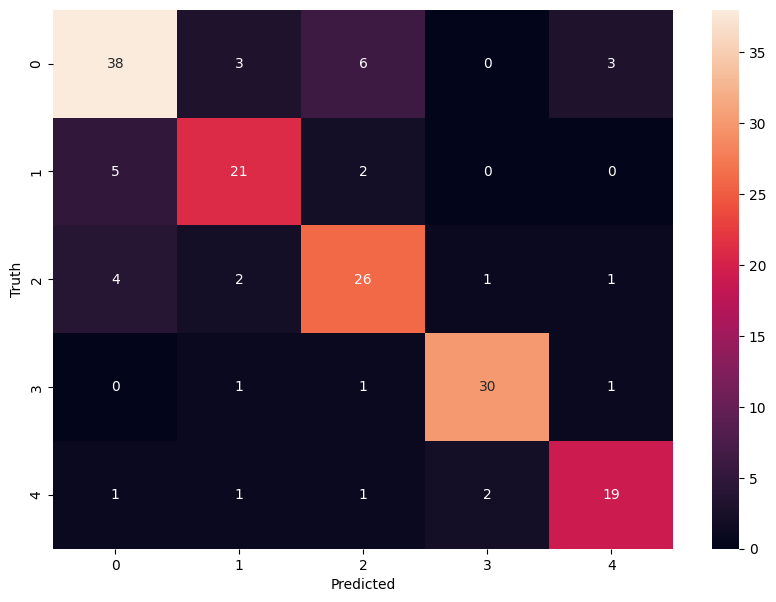

In [105]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [106]:
class_dict

{'Mary-Kate-Olsen': 0,
 'Beyonce': 1,
 'leonardo-dicaprio': 2,
 'Dwayne-Johnson': 3,
 'Aish-Rya': 4}

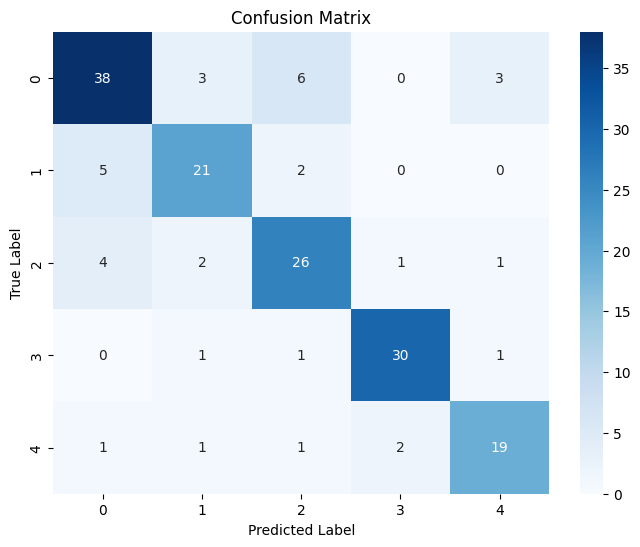

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have the true and predicted labels
y_true = y_test
y_pred = best_estimators['svm'].predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


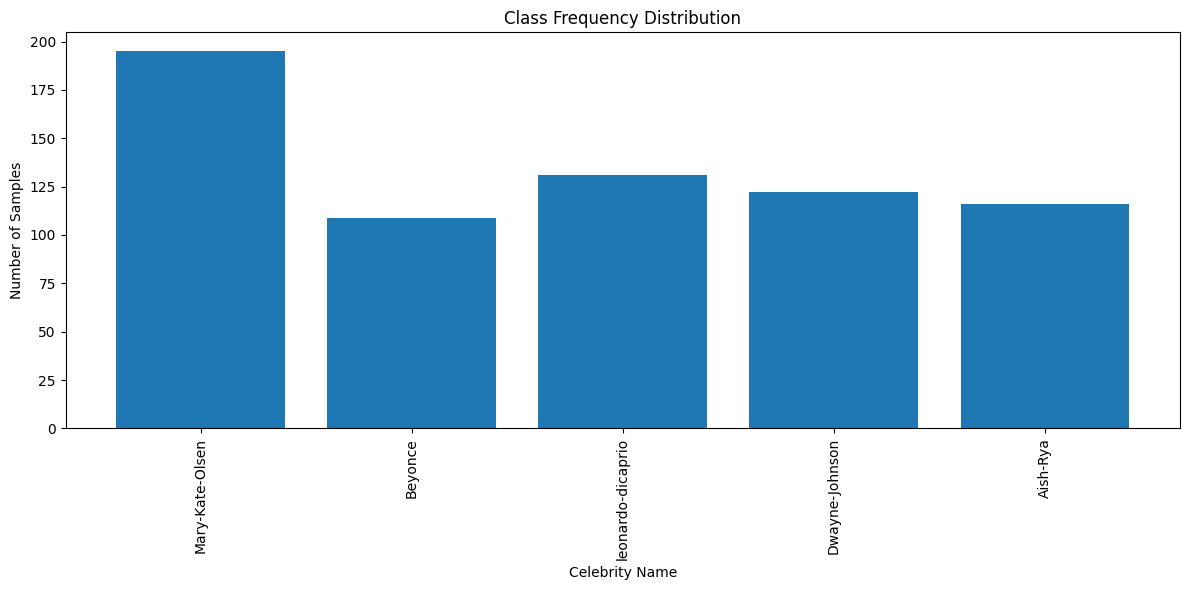

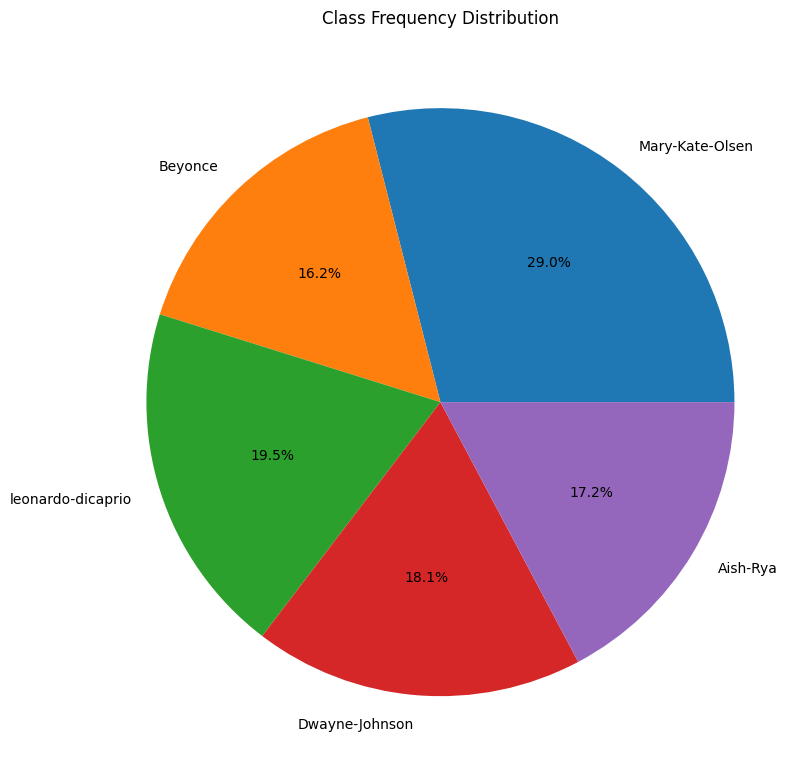

In [108]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the class_dict dictionary that maps the celebrity names to class indices
class_counts = [len(celebrity_file_names_dict[name]) for name in class_dict.keys()]
class_names = list(class_dict.keys())

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(class_names, class_counts)
plt.xticks(rotation=90)
plt.title('Class Frequency Distribution')
plt.xlabel('Celebrity Name')
plt.ylabel('Number of Samples')
plt.tight_layout()
plt.show()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_names, autopct='%1.1f%%')
plt.title('Class Frequency Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()


[38 21 26 30 19]


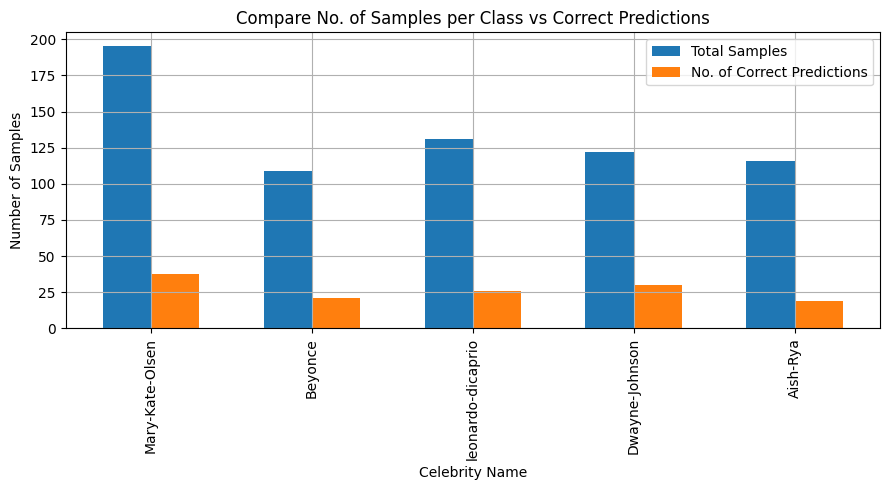

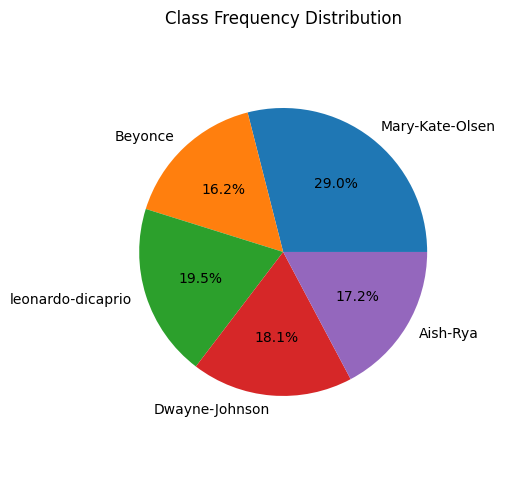

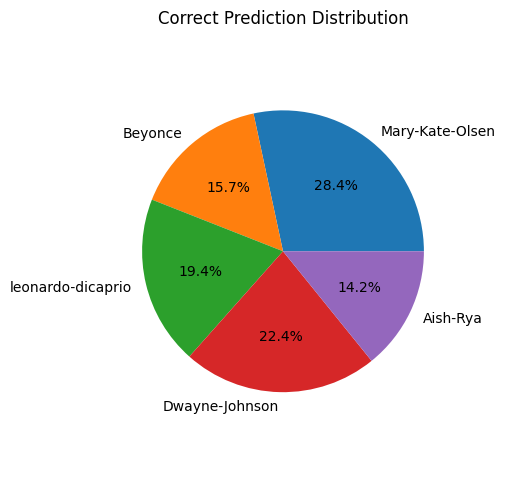

In [148]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the class_dict dictionary that maps the celebrity names to class indices
class_counts = [len(celebrity_file_names_dict[name]) for name in class_dict.keys()]
class_names = list(class_dict.keys())

ind = np.arange(5)
# Create a bar plot
plt.figure(figsize=(9, 5))

width = 0.3
plt.bar(ind, class_counts, width, label="Total Samples")
true_preds = cm.diagonal()
print(true_preds)
plt.bar(ind +width, true_preds, width, label="No. of Correct Predictions")



plt.xticks(ind + width / 2, class_names, rotation=90)
plt.grid()
plt.title('Compare No. of Samples per Class vs Correct Predictions')
plt.xlabel('Celebrity Name')
plt.ylabel('Number of Samples')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(class_counts, labels=class_names, autopct='%1.1f%%')
plt.title('Class Frequency Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 5))
plt.pie(true_preds, labels=class_names, autopct='%1.1f%%')
plt.title('Correct Prediction Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

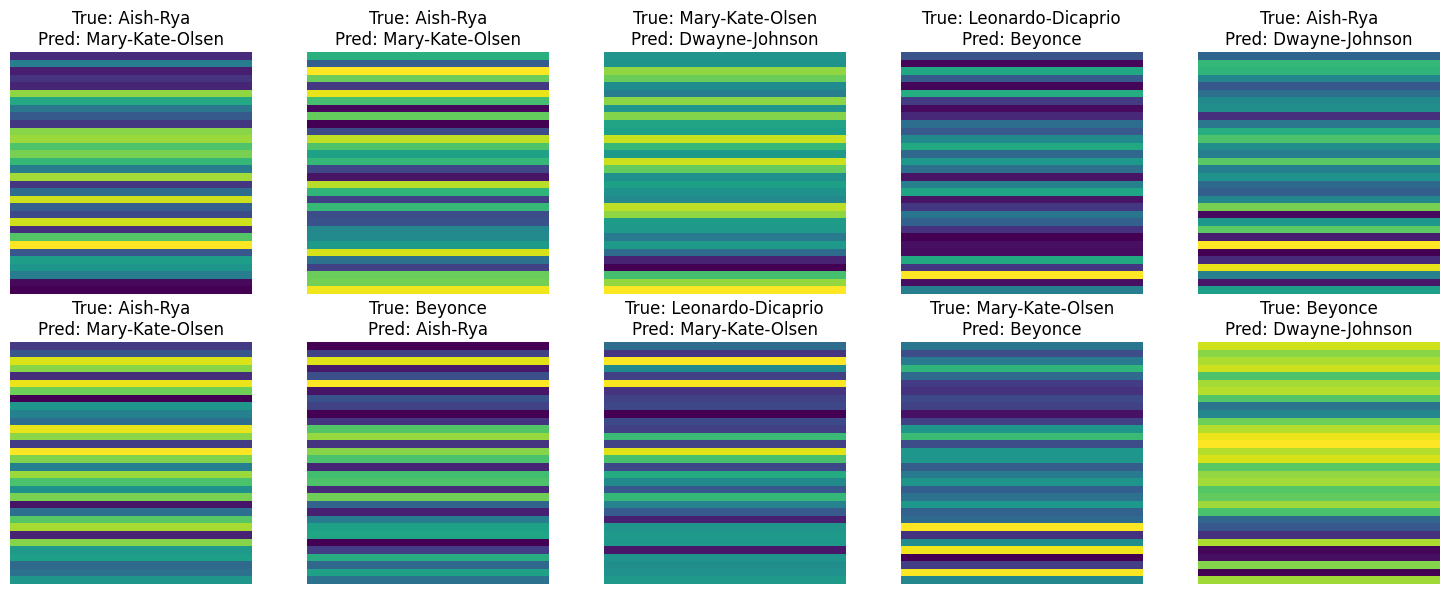

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

def visualize_misclassified_instances(X_test, y_test, y_pred, class_dict):
    """
    Visualizes a sample of misclassified instances from the test set.
    
    Args:
        X_test (numpy.ndarray): The test set features. Expected shape: (num_samples, 32, 32, 3)
        y_test (numpy.ndarray): The true labels of the test set.
        y_pred (numpy.ndarray): The predicted labels of the test set.
        class_dict (dict): A dictionary mapping class names to integer labels.
    """
    # Find the indices of the misclassified instances
    misclassified_indices = np.where(y_test != y_pred)[0]
    
    # Select a sample of misclassified instances
    sample_size = min(10, len(misclassified_indices))
    sample_indices = np.random.choice(misclassified_indices, size=sample_size, replace=False)
    
    # Create a figure with subplots
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    
    # Iterate over the sample of misclassified instances
    for i, idx in enumerate(sample_indices):
        row = i // 5
        col = i % 5
        
        # Get the true and predicted labels
        true_label = list(class_dict.keys())[list(class_dict.values()).index(y_test[idx])]
        pred_label = list(class_dict.keys())[list(class_dict.values()).index(y_pred[idx])]
        
        # Plot the image
        axes[row, col].imshow(X_test[idx])
        axes[row, col].set_title(f"True: {true_label}\nPred: {pred_label}")
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()

# Assuming you have the following variables
X_test = np.array([cv2.resize(img, (32, 32)) for img in X_test])
y_test = y_test
y_pred = y_pred
class_dict = {'Aish-Rya': 0, 'Beyonce': 1, 'Dwayne-Johnson': 2, 'Leonardo-Dicaprio': 3, 'Mary-Kate-Olsen': 4}

# Call the visualization function
visualize_misclassified_instances(X_test, y_test, y_pred, class_dict)


In [52]:
#!pip install joblib
import joblib
# Save the model as a pickle in a file
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']